<a href="https://colab.research.google.com/github/Jonuele/ProyectoFinal_DATA/blob/main/Proyecto_Final_Lopez_Jonathan_38938005_Comision_61190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO FINAL DATA SCIENCE - PREDICCION DE ACCIONES

Presentacion del proyecto formato PDF

https://www.canva.com/design/DAGUuXnRP3U/isknfyo-b2x8vjaYg7NdHw/edit?utm_content=DAGUuXnRP3U&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

Repositorio GITHUB

https://github.com/Jonuele/ProyectoFinal_DATA

#Instalacion de Librerias

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=4723a9ee80a78bfbf25a709a64ab420f6a32012c13da6ecb6a33e9f77004facd
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


#Importacion de Librerias

In [ ]:
import pandas as pd
import numpy as np
import pandas_ta as ta

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns



#Carga de Datos

In [ ]:

url = 'https://raw.githubusercontent.com/Jonuele/ProyectoFinal_DATA/de4be10172ac5c1863247fa47d7ccdc76952714d/Historico%20Tesla.xlsx'

data = pd.read_excel(url, engine='openpyxl')
print(data.head())

  Fecha Cotización  Apertura  Máximo  Mínimo  Cierre  Cierre ajustado  \
0       2024-08-30    208.63  214.56  207.03  214.29           214.29   
1       2024-08-29    209.80  214.89  205.98  206.18           206.18   
2       2024-08-28    209.72  211.83  202.60  205.65           205.65   
3       2024-08-27    213.25  215.62  206.95  209.33           209.33   
4       2024-08-26    218.75  219.08  211.03  213.15           213.15   

   Volumen Monto  Volumen Nominal  
0     6576345.81         45490831  
1      254838.48                0  
2     3295335.60                0  
3     6369074.58                0  
4     7559577.90                0  


#Exploracion de Datos

In [ ]:
#Imprimimos las columnas
print(data.columns)


Index(['Fecha Cotización', 'Apertura', 'Máximo', 'Mínimo', 'Cierre',
       'Cierre ajustado', 'Volumen Monto', 'Volumen Nominal'],
      dtype='object')


In [ ]:
#Observamos la composicion del dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha Cotización  3207 non-null   datetime64[ns]
 1   Apertura          3207 non-null   float64       
 2   Máximo            3207 non-null   float64       
 3   Mínimo            3207 non-null   float64       
 4   Cierre            3207 non-null   float64       
 5   Cierre ajustado   3207 non-null   float64       
 6   Volumen Monto     3207 non-null   float64       
 7   Volumen Nominal   3207 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 200.6 KB
None


In [ ]:
#Convertimos las fecha en indice
data['Fecha Cotización'] = pd.to_datetime(data['Fecha Cotización'])
data.set_index('Fecha Cotización', inplace=True)

In [ ]:
#Ordenamos los datos por fecha de más antiguo a más reciente
data.sort_index(ascending=True, inplace=True)

In [ ]:
#Preparamos nuevas columnas / Medias Moviles Exponenciales de CORTO PLAZO.
data['EMA_5'] = ta.ema(data['Cierre'], length=5)
data['EMA_10'] = ta.ema(data['Cierre'], length=10)
data['EMA_20'] = ta.ema(data['Cierre'], length=20)

In [ ]:
#Preparamos nuevas columnas / Medias Moviles Exponenciales de LARGO PLAZO.
data['EMA_50'] = ta.ema(data['Cierre'], length=50)
data['EMA_100'] = ta.ema(data['Cierre'], length=100)
data['EMA_200'] = ta.ema(data['Cierre'], length=200)

In [ ]:
#Preparacion de nuevas columnas / Indice de Fuerza Relativa
data['RSI'] = ta.rsi(data['Cierre'], length=14)

In [ ]:
#Verificamos la posibilidad y existencia de nulos
print(data.isnull().sum())

Apertura             0
Máximo               0
Mínimo               0
Cierre               0
Cierre ajustado      0
Volumen Monto        0
Volumen Nominal      0
EMA_5                4
EMA_10               9
EMA_20              19
EMA_50              49
EMA_100             99
EMA_200            199
RSI                 14
dtype: int64



Reemplazamos los nulos por ceros ya que no afecta para el calculo de las medias moviles exponenciales (ema), pero son filas necesarias en el dataframe


In [ ]:
#Reemplazamos nulos por ceros
data.fillna(0, inplace=True)

Text(0.5, 1.0, 'Matriz de Datos Faltantes')

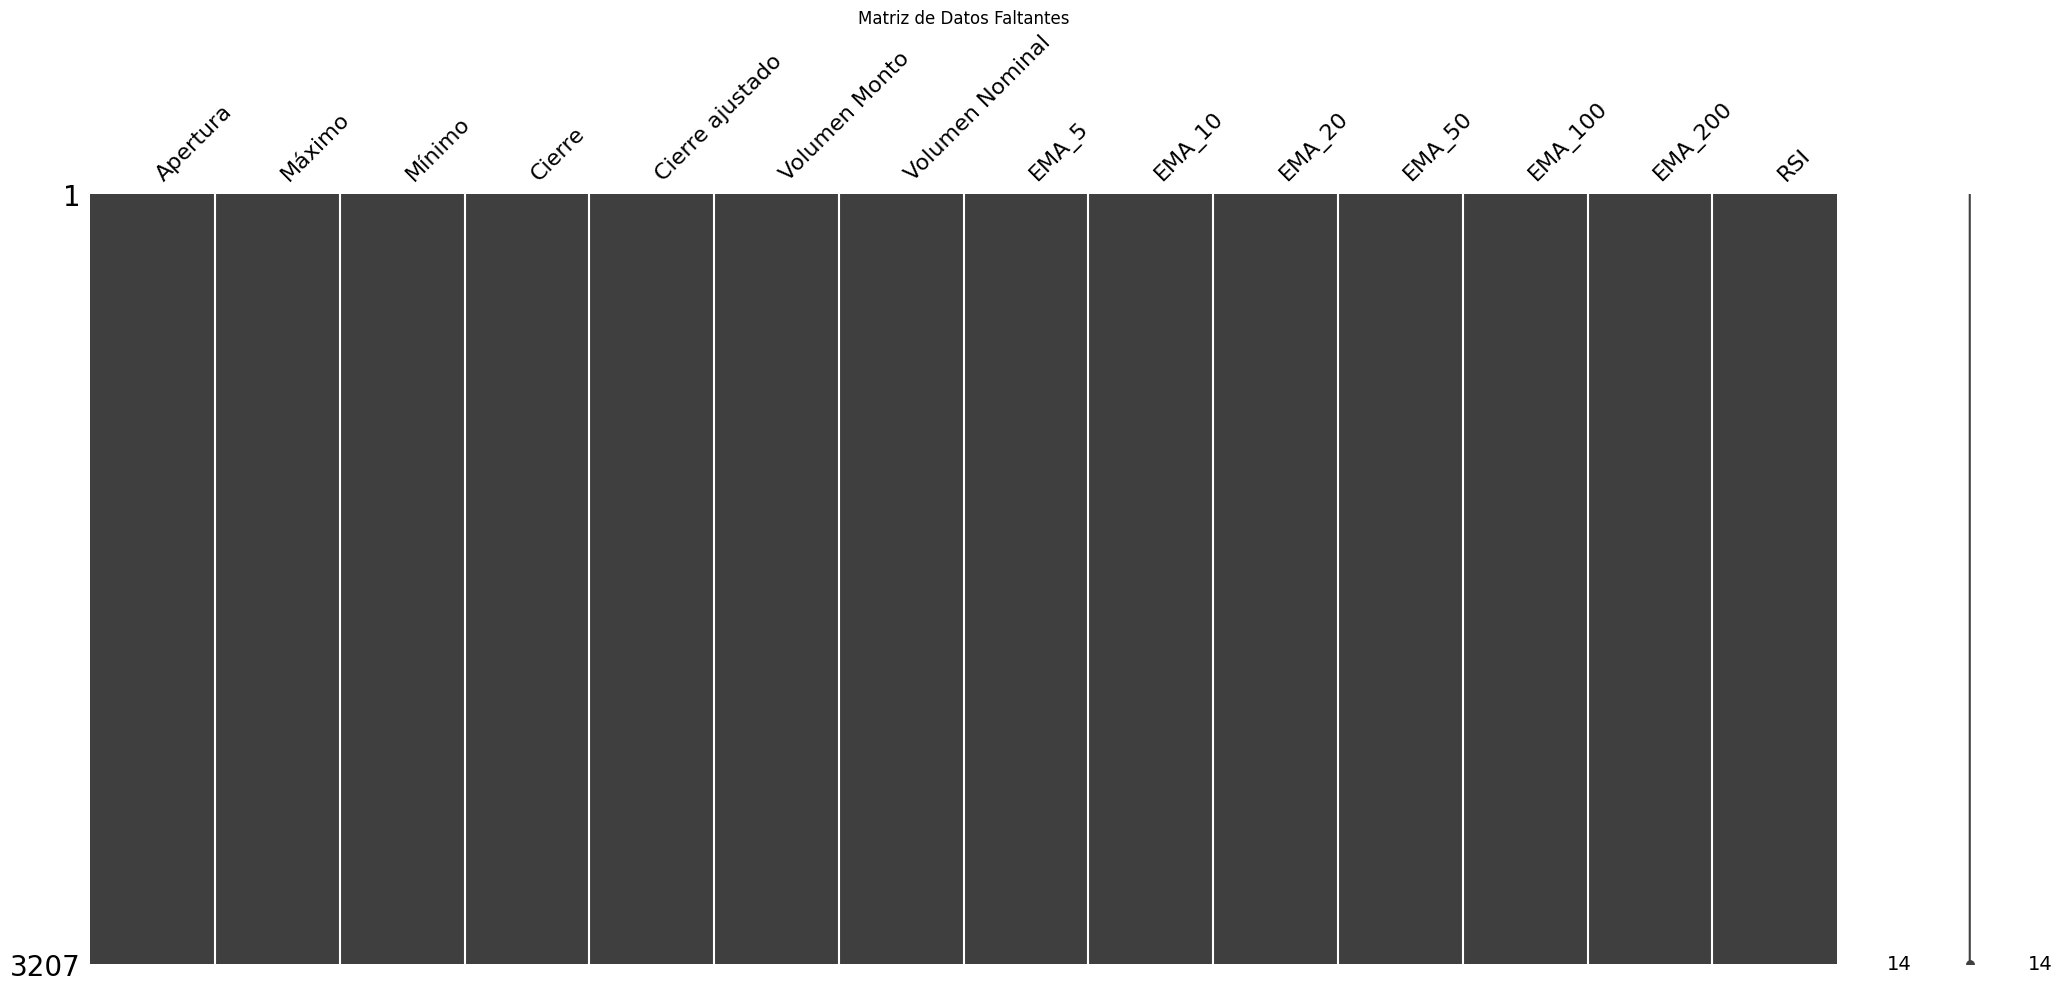

In [ ]:
#Importamos MSNO y verificamos el impacto de los DATOS AUSENTES

msno.matrix(data)
plt.title('Matriz de Datos Faltantes')

In [ ]:
#Generamos un Describre para observar la informacion

print(data[['Apertura','Máximo','Mínimo','Cierre','Volumen Monto']].describe())



          Apertura       Máximo       Mínimo       Cierre  Volumen Monto
count  3207.000000  3207.000000  3207.000000  3207.000000   3.207000e+03
mean    305.440589   311.780128   297.767412   305.523034   4.684035e+06
std     299.178729   307.374290   290.945366   299.306227   1.080066e+07
min       0.000000     0.000000     0.000000    17.600000   0.000000e+00
25%     149.095000   150.400000   142.425000   147.960000   2.000000e+01
50%     223.480000   227.090000   219.110000   223.040000   1.000000e+02
75%     322.360000   327.190000   315.380000   323.440000   3.321479e+06
max    2295.120000  2318.490000  2186.520000  2224.080000   7.013330e+07


¿Existen periodos específicos donde el rendimiento de la acción es históricamente más alto o bajo? Respondiendo a esta pregunta podemos observar que el precio de Cierre maximo fue de USD 2224.00 mientras que el minimo de USD 17.60

In [ ]:
print('Maximo Historico=', data['Cierre'].max())
print('Minimo Historico=', data['Cierre'].min())

data_filtrada = data[(data['Cierre'] > 2000)][['Cierre']]
data_filtrada_1 = data[(data['Cierre'] < 20)][['Cierre']]
print(data_filtrada)
print(data_filtrada_1)

Maximo Historico= 2224.08
Minimo Historico= 17.6
                   Cierre
Fecha Cotización         
2020-08-20        2007.56
2020-08-21        2051.59
2020-08-24        2007.29
2020-08-25        2011.30
2020-08-26        2153.45
2020-08-27        2224.08
2020-08-28        2215.22
                  Cierre
Fecha Cotización        
2010-07-30         19.94
2010-08-06         19.59
2010-08-09         19.60
2010-08-10         19.06
2010-08-11         17.86
2010-08-12         17.60
2010-08-13         18.32
2010-08-16         18.76
2010-08-17         19.15
2010-08-18         18.77
2010-08-19         18.79
2010-08-20         19.10
2010-08-24         19.20
2010-08-25         19.90
2010-08-26         19.66
2010-08-27         19.68
2010-08-30         19.87
2010-08-31         19.48
2010-09-22         19.87
2010-09-23         19.56


#Graficos

En estos graficos no podemos contemplar outliers ni identificar aspectos que presenten valores extraños. esto es porque estamos analizando acciones por lo tanto es normal las variaciones en las variables analizadas. De todas formas, podemos observar que los outliers en el Boxplot, nos marca maximos increibles de la accion. Por otro lado en el Histograma podemos ver la tendencia asimetrica y decreciente.

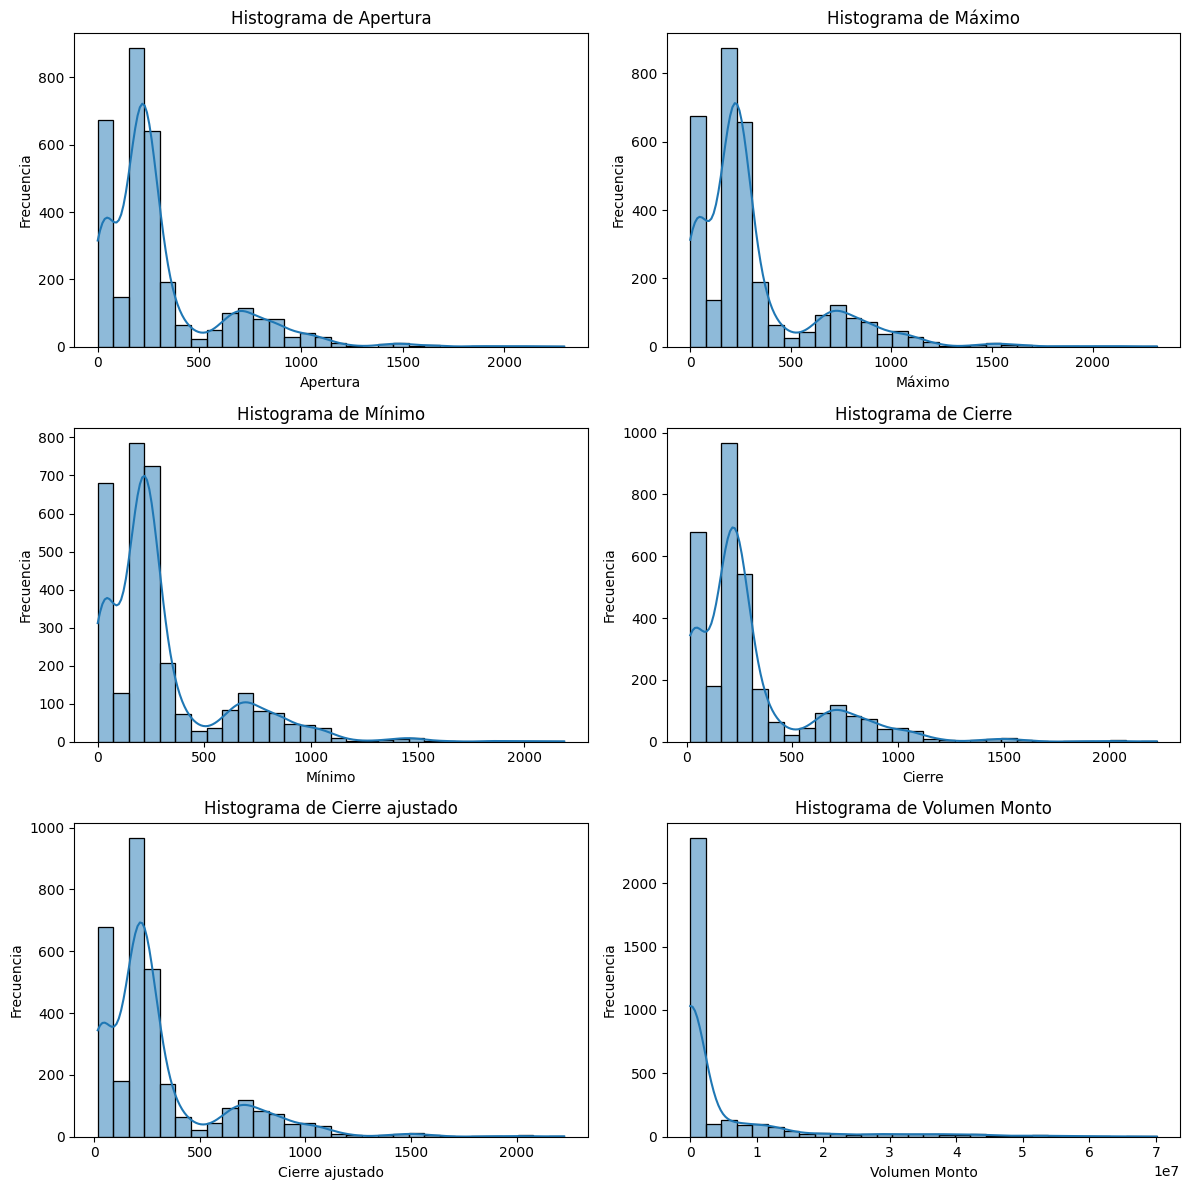

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
columns = ['Apertura', 'Máximo', 'Mínimo', 'Cierre', 'Cierre ajustado', 'Volumen Monto']
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data[col], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

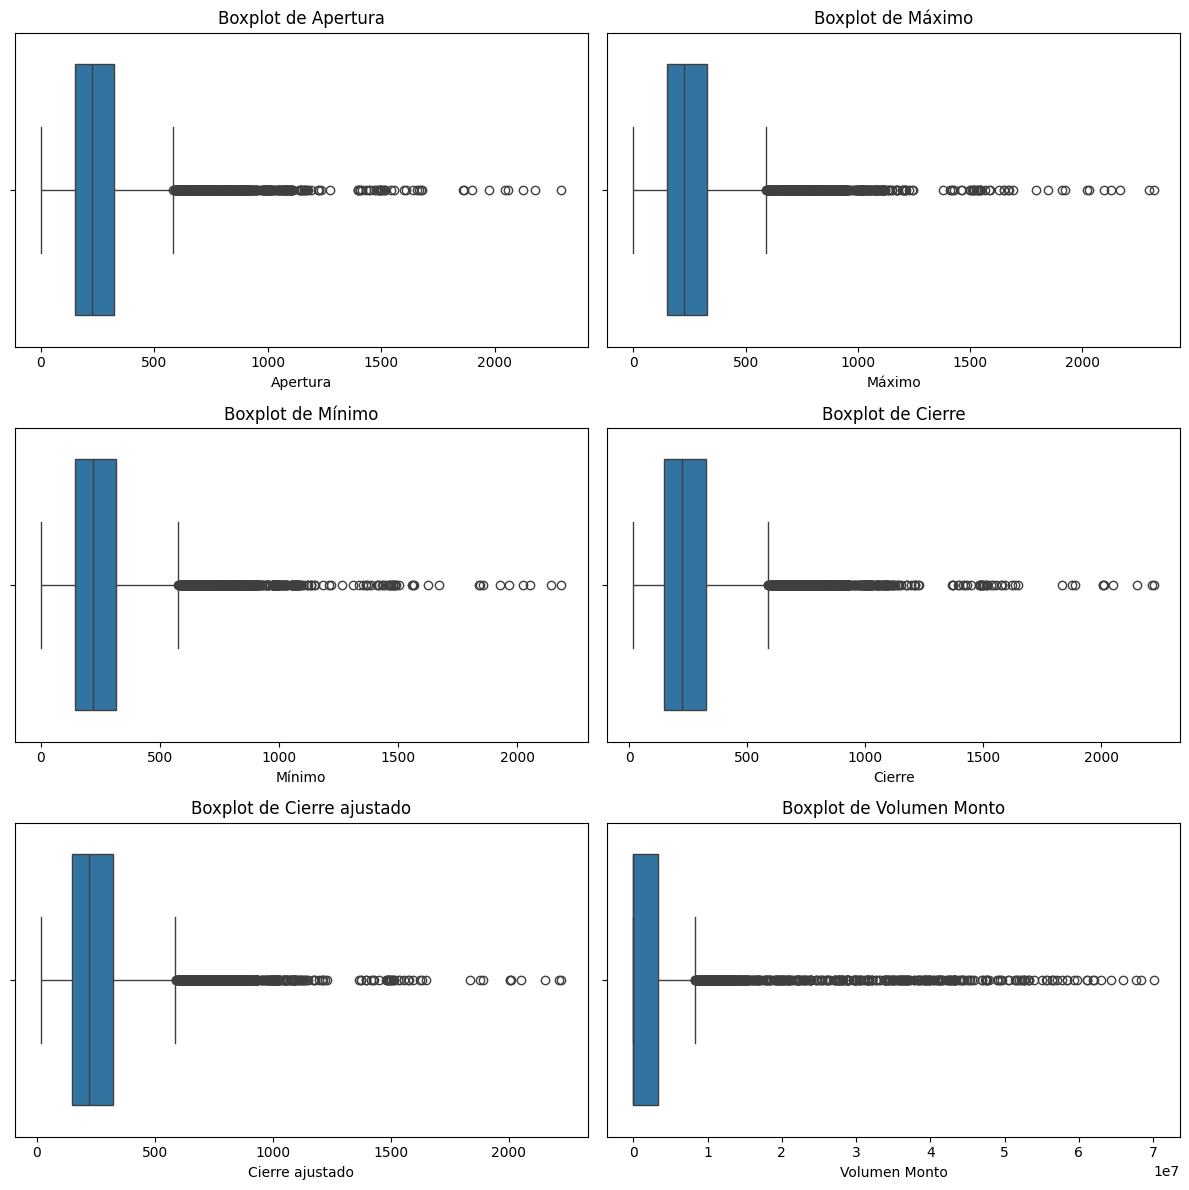

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.boxplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

###Correlacion entre variables

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Apertura'),
  Text(0, 1.5, 'Máximo'),
  Text(0, 2.5, 'Mínimo'),
  Text(0, 3.5, 'Cierre'),
  Text(0, 4.5, 'Cierre ajustado'),
  Text(0, 5.5, 'Volumen Monto')])

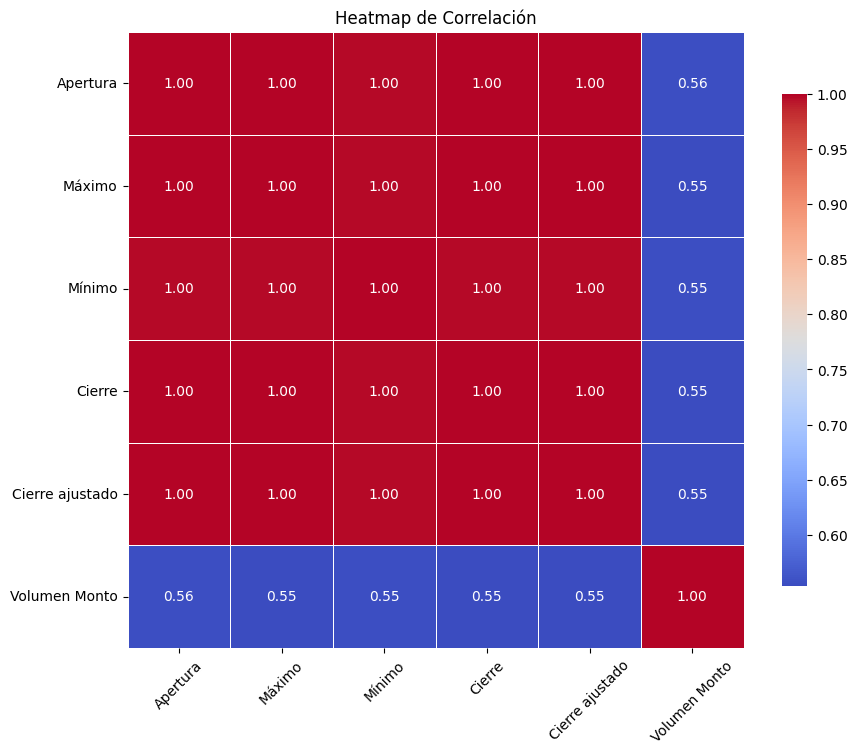

In [ ]:
correlation_matrix = data[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Heatmap de Correlación')
plt.xticks(rotation=45)
plt.yticks(rotation=0)


##¿Qué impacto tienen los indicadores técnicos como EMA (media móvil exponencial) y RSI (índice de fuerza relativa) en la tendencia de los precios?

##Subplot 1: Gráfico del precio de cierre y medias móviles

Cuando la Media movil de 20 dias (EMA20) cruza de abajo hacia arriba a la media movil de 100 dias es un indicador de que el precio puede comenzar una tendencia alcista y visceversa.

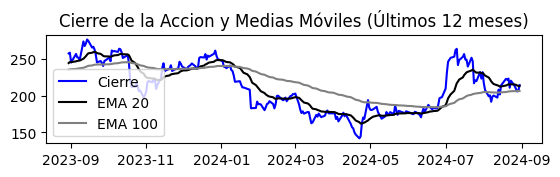

In [ ]:
end_date = data.index.max()  # Fecha más reciente en los datos
start_date = end_date - pd.DateOffset(months=12)  # Fecha de hace 12 meses
filtered_data = data[(data.index >= start_date) & (data.index <= end_date)]

plt.subplot(3, 1, 1)
plt.plot(filtered_data.index, filtered_data['Cierre'], label='Cierre', color='blue')
plt.plot(filtered_data.index, filtered_data['EMA_20'], label='EMA 20', color='black')
plt.plot(filtered_data.index, filtered_data['EMA_100'], label='EMA 100', color='grey')
plt.title('Cierre de la Accion y Medias Móviles (Últimos 12 meses)')
plt.legend()
plt.show()

##Subplot 2: Gráfico del RSI

Cuando el indicador RSI se encuentra por debajo de los 30 estamos en sobreventa, es decir es una buena oportunidad para comprar, en cambio cuando el RSI está por encima de los 70 estamos en sobrecompra, es decir es buen momento para vender.

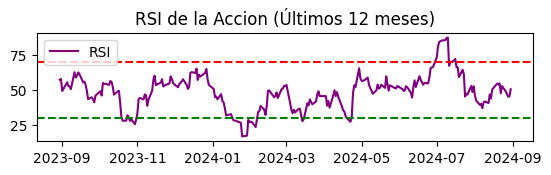

In [ ]:

plt.subplot(3, 1, 2)
plt.plot(filtered_data.index, filtered_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red')  # Nivel de sobrecompra
plt.axhline(30, linestyle='--', color='green')  # Nivel de sobreventa
plt.title('RSI de la Accion (Últimos 12 meses)')
plt.legend()

plt.show()

#Informe

In [ ]:
#Preparacion de informes para recomendacion
latest_price = data['Cierre'].iloc[-1]
latest_rsi = data['RSI'].iloc[-1]
ema_5 = data['EMA_5'].iloc[-1]
ema_10 = data['EMA_10'].iloc[-1]
ema_20 = data['EMA_20'].iloc[-1]

ema_50 = data['EMA_50'].iloc[-1]
ema_100 = data['EMA_100'].iloc[-1]
ema_200 = data['EMA_200'].iloc[-1]


##RECOMENDACIÓN DE CORTO PLAZO

In [ ]:
print("## Informe de Análisis de la Acción (Corto Plazo) ##")
print(f"Último Precio de Cierre: ${latest_price:.2f}")
print(f"EMA 5: ${ema_5:.2f}")
print(f"EMA 10: ${ema_10:.2f}")
print(f"EMA 20: ${ema_20:.2f}")
print(f"RSI: {latest_rsi:.2f}")

    #Evaluacion de Tendencia
if ema_5 > ema_10 and ema_10 > ema_20:
        print("Tendencia: Alcista")
elif ema_5 < ema_10 and ema_10 < ema_20:
        print("Tendencia: Bajista")
else:
        print("Tendencia: Lateral")

    # Evaluación del RSI
if latest_rsi > 70:
        print("Estado: Sobrecomprado - Puede ser una señal de venta.")
elif latest_rsi < 30:
        print("Estado: Sobrevendido - Puede ser una señal de compra.")
else:
        print("Estado: Neutral")

    #Conclusion
if ema_5 > latest_price:
        print("Recomendación: Considerar venta.")
elif latest_price > ema_20:
        print("Recomendación: Considerar compra.")
else:
        print("Recomendación: Mantener posición.")




## Informe de Análisis de la Acción (Corto Plazo) ##
Último Precio de Cierre: $214.29
EMA 5: $211.06
EMA 10: $211.81
EMA 20: $213.16
RSI: 50.31
Tendencia: Bajista
Estado: Neutral
Recomendación: Considerar compra.


##RECOMENDACIÓN DE LARGO PLAZO

In [ ]:
print("## Informe de Análisis de la Acción (Largo Plazo) ##")
print(f"Último Precio de Cierre: ${latest_price:.2f}")
print(f"EMA 50: ${ema_50:.2f}")
print(f"EMA 100: ${ema_100:.2f}")
print(f"EMA 200: ${ema_200:.2f}")
print(f"RSI: {latest_rsi:.2f}")


    #Evaluacion de Tendencia
if ema_50 > ema_100 and ema_100 > ema_200:
        print("Tendencia: Alcista")
elif ema_50 < ema_100 and ema_100 < ema_200:
        print("Tendencia: Bajista")
else:
        print("Tendencia: Lateral")

    # Evaluación del RSI
if latest_rsi > 70:
        print("Estado: Sobrecomprado - Puede ser una señal de venta.")
elif latest_rsi < 30:
        print("Estado: Sobrevendido - Puede ser una señal de compra.")
else:
        print("Estado: Neutral")

    #Conclusion
if ema_50 > latest_price:
        print("Recomendación: Considerar venta.")
elif latest_price > ema_200:
        print("Recomendación: Considerar compra.")
else:
        print("Recomendación: Mantener posición.")

## Informe de Análisis de la Acción (Largo Plazo) ##
Último Precio de Cierre: $214.29
EMA 50: $211.96
EMA 100: $206.33
EMA 200: $209.70
RSI: 50.31
Tendencia: Lateral
Estado: Neutral
Recomendación: Considerar compra.


Proximamente seguiremos respondiendo las preguntas y probando hipotesis. Vamos a probar los modelos de prediccion y generar informacion de valor.
Sabemos que el modelo de regresion lineal no va a ser muy efectivo, pero de todas formas probaremos hasta encontrar el que mejor se adapte.

#PCA

In [ ]:
X = data.drop(columns=['Cierre']).values

y = data['Cierre'].values

In [ ]:
#Separamos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Normalizamos los datos

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Procesamos los datos con el modelo PCA reduciendo la catidad de componentes a 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_trainpca = pca.fit_transform(X_train)
X_testpca = pca.transform(X_test)

In [ ]:
#Verificamos la varianza de los componentes
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.76363644, 0.08795107])

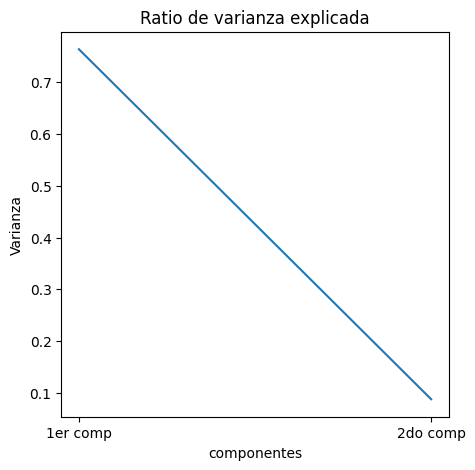

In [ ]:
# Ploteamos la varianza de los componentes
plt.figure(figsize=(5,5))
plt.plot(range(0,2), pca.explained_variance_ratio_)
plt.ylabel('Varianza')
plt.xlabel('componentes')
plt.xticks(range(0,2), ["1er comp", "2do comp"])
plt.title('Ratio de varianza explicada')
plt.show()

Podemos ver que el primer componente explica el 72.81% de la variabilidad de mis datos y el segundo el 16.49%. Es decir que el PCA permitio reducir la dimensionalidad de los datos a dos componentes mientras mantiene el 89.3% de la varianza.

#Entrenamientos, Validacion, Optimizacion y seleccion de modelos

En este apartado probaremos diferentes modelos, quedandonos finalmente con el que mejor confianza y robustes genere.

El modelo seleccionado sera por Regresion ya que buscamos predecir el precio de un activo, en este caso el de una accion.

##Regresion Lineal

In [ ]:
#creamos un dataset con las variables de fecha y valor de cierre
data2 = data[['Cierre']].copy()
data2['Fecha Cotizacion']=data.index
#data2.set_index('Fecha Cotización', inplace=True)

data2['Fecha'] = (data2.index - data2.index.min()).days

In [ ]:
X2=data2[['Fecha']]
y2=data2['Cierre']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [ ]:
#importamos el modelo y entrenamos los datos
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Realizamos la prediccion manteniendo el indice de la variable
y_pred = pd.Series(model.predict(X_test), index=X_test.index)

In [ ]:
#Verificamos la media del error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

250.98897030294245

In [ ]:
#Verificamos la media del error absoluto
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

158.2424064922536

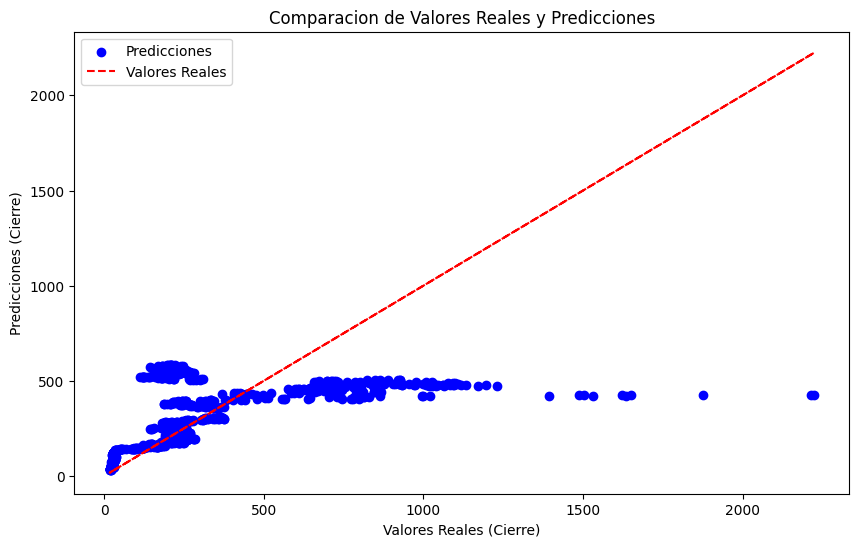

In [ ]:
#Graficamos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Valores Reales')
plt.xlabel('Valores Reales (Cierre)')
plt.ylabel('Predicciones (Cierre)')
plt.title('Comparacion de Valores Reales y Predicciones')
plt.legend()
plt.show()

In [ ]:
#Creamos un dataset con el valor actual y el valor predicho
data_2= pd.DataFrame({'Real':y_test, 'Prediccion':y_pred})

print(data_2.sort_index(ascending=False).head(10))

                    Real  Prediccion
Fecha Cotización                    
2024-08-30        214.29  584.303546
2024-08-29        206.18  584.196323
2024-08-27        209.33  583.981876
2024-08-22        210.72  583.445759
2024-08-19        222.79  583.124089
2024-08-12        197.33  582.373526
2024-08-06        200.35  581.730186
2024-08-02        207.68  581.301292
2024-07-26        219.62  580.550729
2024-07-25        220.80  580.443506


RESULTADOS OBTENIDOS


In [ ]:
#RESULTADOS FINALES Y CONCLUSION
print('RSME=', rmse)
print('MAE=',mae)
print(data_2.sort_index(ascending=False).head(10))

RSME= 250.98897030294245
MAE= 158.2424064922536
                    Real  Prediccion
Fecha Cotización                    
2024-08-30        214.29  584.303546
2024-08-29        206.18  584.196323
2024-08-27        209.33  583.981876
2024-08-22        210.72  583.445759
2024-08-19        222.79  583.124089
2024-08-12        197.33  582.373526
2024-08-06        200.35  581.730186
2024-08-02        207.68  581.301292
2024-07-26        219.62  580.550729
2024-07-25        220.80  580.443506


En el Modelo de Regresion Lineal podemos observar que tenemos un error cuadratico medio de USD 250 y un error absoluto medio de USD 158.24 es decir, que el modelo puede equivocarse en USD 158.24, lo cual es mucho dinero.

A su vez puede observarse la grafica que no representa en absoluto un modelo a aplicar.

Ambos indicadores son muy altos para poder contemplarlo como un modelo robusto de prediccion.

##Arbol de Decision

In [ ]:
#importamos el modelo y entrenamos los datos
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
#Realizamos la prediccion
y_pred = model.predict(X_test)

In [ ]:
#Verificamos la media del error/ la media del error absoluto
rmse_AD = mean_squared_error(y_test, y_pred)
mae_AD = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse_AD}')
print(f'MAE: {mae_AD}')


RMSE: 314.90515669781934
MAE: 8.147819314641744


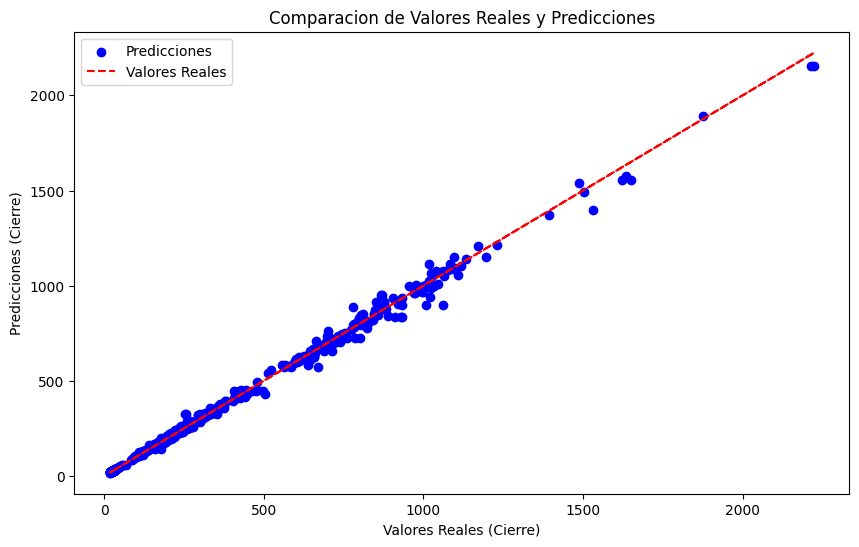

In [ ]:
#Graficamos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Valores Reales')
plt.xlabel('Valores Reales (Cierre)')
plt.ylabel('Predicciones (Cierre)')
plt.title('Comparacion de Valores Reales y Predicciones')
plt.legend()
plt.show()

In [ ]:
#Creamos un dataset con el valor actual y el valor predicho
data_2= pd.DataFrame({'Real':y_test, 'Prediccion':y_pred})

print(data_2.sort_index(ascending=False).head(10))

                    Real  Prediccion
Fecha Cotización                    
2024-08-30        214.29      205.65
2024-08-29        206.18      205.65
2024-08-27        209.33      213.15
2024-08-22        210.72      223.16
2024-08-19        222.79      221.55
2024-08-12        197.33      208.03
2024-08-06        200.35      199.03
2024-08-02        207.68      216.82
2024-07-26        219.62      216.77
2024-07-25        220.80      216.77


En el Modelo de Arbol de Decision podemos observar que tenemos un error cuadratico medio de USD 314.90 y un error absoluto medio de USD 8.14 es decir, que el modelo puede equivocarse en USD 8.14.

Pareceria que el modelo es mejor que la regresion lineal, pero aun asi sigue teniendo diferencias grandes en la prediccion


##LSTM

In [ ]:
#Importamos tecnica de escalado de datos para LSTM
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Definimos un periodo de tiempo >=2022-10-01 para acciones volatiles, se puede tomar el conjunto historico para acciones no volatiles como el S&P

data_filtrada = data[data.index >= '2022-10-01']
precios = data_filtrada[['Cierre','EMA_5','EMA_10','EMA_20','EMA_50','RSI']]

#precios = data[['Cierre','EMA_5','EMA_10','EMA_20','EMA_50','RSI']]
print(precios.head())

                  Cierre       EMA_5      EMA_10      EMA_20      EMA_50  \
Fecha Cotización                                                           
2022-10-03        242.25  264.113021  277.088532  320.997102  469.937760   
2022-10-04        249.57  259.265347  272.085163  314.194521  461.295887   
2022-10-05        240.49  253.006898  266.340588  307.175043  452.636832   
2022-10-06        238.04  248.017932  261.195026  300.590753  444.221270   
2022-10-07        223.31  239.781955  254.306840  293.230682  435.558083   

                        RSI  
Fecha Cotización             
2022-10-03        21.297010  
2022-10-04        23.990889  
2022-10-05        22.941889  
2022-10-06        22.654056  
2022-10-07        20.952059  


In [ ]:
#Preparamos los datos de entrenamiento
division = int(len(precios) * 0.8)  # 80% para entrenamiento
precios_entrenamiento = precios[:division]
precios_prueba = precios[division:]

In [ ]:
#Escalamos los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(precios_entrenamiento)

precios_entrenamiento_escalados = scaler.transform(precios_entrenamiento)
precios_prueba_escalados = scaler.transform(precios_prueba)

In [ ]:
#Preparamos el entrenamiento

ventana = 30  # Usaremos 30 días de datos para predecir el siguiente día


# Construir secuencias de entrenamiento
X_train, y_train = [], []
for i in range(ventana, len(precios_entrenamiento_escalados)):
  X_train.append(precios_entrenamiento_escalados[i-ventana:i, :])  # Ventana de datos
  y_train.append(precios_entrenamiento_escalados[i, 0])           # Valor siguiente

# Convertir a NumPy y redimensionar
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])  # Redimensionar para LSTM

In [ ]:
# Construir secuencias de prueba
X_test, y_test = [], []
for i in range(ventana, len(precios_prueba_escalados)):
    X_test.append(precios_prueba_escalados[i-ventana:i, :])  # Ventana de datos
    y_test.append(precios_prueba_escalados[i, 0])           # Valor siguiente

# Convertir a NumPy y redimensionar
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])  # Redimensionar para LSTM

In [ ]:
#Importamos tecnicas para armar la arquitectura y modelos
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

Esta arquitectura ha sido el resultado de numerosas horas de pruebas y ajustes, en las que se añadieron y eliminaron elementos para encontrar la configuración más eficiente. Consido que esta es la arquitectura óptima obtenida tras un exhaustivo proceso de optimización

In [ ]:
# Definimos la arquitectura del modelo
modelo = Sequential()
modelo.add(Bidirectional(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 6))))
modelo.add(Dropout(0.4))
modelo.add(Bidirectional(LSTM(units=64, return_sequences=True)))
modelo.add(Dropout(0.3))
modelo.add(Bidirectional(LSTM(units=32)))
modelo.add(Dropout(0.2))

modelo.add(Dense(units=16, activation='relu'))
modelo.add(Dense(units=1))
optimizer = Adam(learning_rate=0.0025)
#optimizer = RMSprop(learning_rate=0.001)

modelo.compile(optimizer=optimizer, loss='mean_squared_error')

# Definimos Early Stopping para evitar que el codigo siga corriendo si el modelo no mejora
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Ajustamos el modelo
historico = modelo.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1, callbacks=[early_stop])

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 415ms/step - loss: 0.1743 - val_loss: 0.0209
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - loss: 0.0366 - val_loss: 0.0241
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - loss: 0.0306 - val_loss: 0.0128
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - loss: 0.0201 - val_loss: 0.0211
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: 0.0160 - val_loss: 0.0094
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - loss: 0.0131 - val_loss: 0.0077
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - loss: 0.0098 - val_loss: 0.0079
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - loss: 0.0102 - val_loss: 0.0060
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - loss: 0.0082 - val_loss: 0.0066
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 0.

In [ ]:
# Predicciones
predicciones = modelo.predict(X_test)

# Matriz con 6 columnas (1 para el precio y 5 para EMA/RSI)
predicciones_con_emarisi = np.zeros((predicciones.shape[0], 6))

# Asignamos la columna de precios a la primera columna
predicciones_con_emarisi[:, 0] = predicciones[:, 0]

# Invertimos la normalizacion usando la matriz completa
predicciones_desnormalizadas = scaler.inverse_transform(predicciones_con_emarisi)

# Extraemos solo la columna de precios desnormalizados
predicciones_finales = predicciones_desnormalizadas[:, 0]

# Escalado inverso
# Invertir la normalizacion de y_test
y_test = y_test.reshape(-1, 1)
y_test_con_emarisi = np.zeros((y_test.shape[0], 6))
y_test_con_emarisi[:, 0] = y_test[:, 0]

# Invertimos la normalizacion de la matriz completa
y_test_inv = scaler.inverse_transform(y_test_con_emarisi)

# Extraemos solo la columna del precio desnormalizado
y_test_final = y_test_inv[:, 0]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step


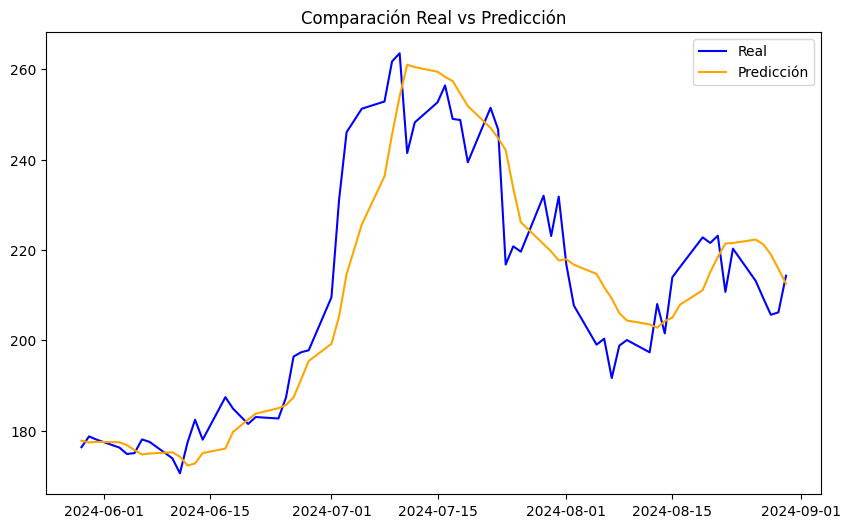

In [ ]:
# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test_final):], y_test_final, label="Real", color="blue")
plt.plot(data.index[-len(y_test_final):], predicciones_finales, label="Predicción", color="orange")
plt.legend()
plt.title("Comparación Real vs Predicción")
plt.show()

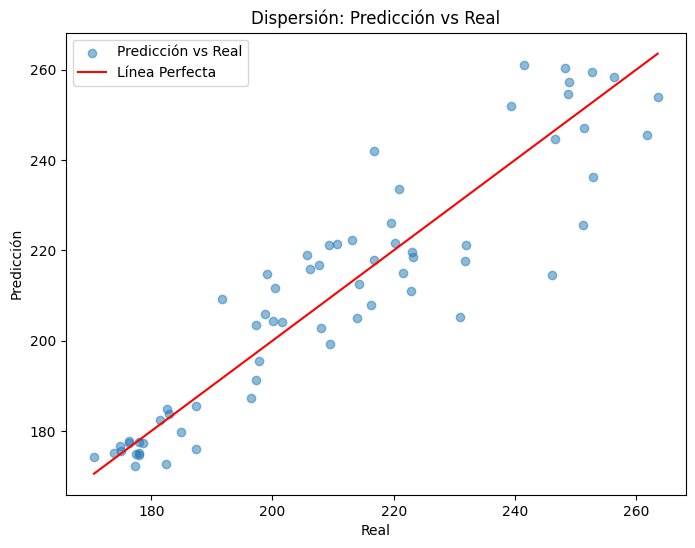

In [ ]:
#Graficamos dispersion
plt.figure(figsize=(8, 6))
plt.scatter(y_test_final, predicciones_finales, alpha=0.5, label="Predicción vs Real")
plt.plot([min(y_test_final), max(y_test_final)], [min(y_test_final), max(y_test_final)], color='red', label="Línea Perfecta")
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.legend()
plt.title("Dispersión: Predicción vs Real")
plt.show()

In [ ]:
#Verificamos la media del error/ la media del error absoluto
mae = mean_absolute_error(y_test_final, predicciones_finales)
rmse = np.sqrt(mean_squared_error(y_test_final, predicciones_finales))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 8.12
RMSE: 10.60


In [ ]:
#Trabajamos en la prediccion de lo proximos 10 dias

ultimo_dia = precios_prueba_escalados[-ventana:]  # Ultimos 30 días de prueba escalados

# Lista para almacenar las predicciones
predicciones_futuras = []

for _ in range(10):

  prediccion = modelo.predict(ultimo_dia.reshape(1, ventana, 6))  # Redimensionar para LSTM

# Almacenamos la prediccion
  predicciones_futuras.append(prediccion[0, 0])
  ultimo_dia = np.roll(ultimo_dia, -1, axis=0)
  ultimo_dia[-1, 0] = prediccion

# Desnormalizamos las predicciones
predicciones_futuras_con_emarisi = np.zeros((len(predicciones_futuras), 6))
predicciones_futuras_con_emarisi[:, 0] = predicciones_futuras

# Invertimos la normalizacion de las predicciones futuras
predicciones_futuras_desnormalizadas = scaler.inverse_transform(predicciones_futuras_con_emarisi)

# Extraemos solo la columna de precios desnormalizados
predicciones_futuras_finales = predicciones_futuras_desnormalizadas[:, 0]

# Crear las fechas para los proximos 10 días
fechas_futuras = pd.date_range(data.index[-1], periods=11, freq='D')[1:]

# DataFrame con las predicciones
predicciones_df = pd.DataFrame({'Fecha': fechas_futuras,'Predicción': predicciones_futuras_finales})

# Imprimimos el DataFrame con las predicciones
print(predicciones_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


<ipython-input-75-334a22d0b216>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ultimo_dia[-1, 0] = prediccion


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
       Fecha  Predicción
0 2024-08-31  210.882485
1 2024-09-01  213.015388
2 2024-09-02  215.601789
3 2024-09-03  215.425024
4 2024-09-04  215.185329
5 2024-09-05  214.628932
6 2024-09-06  215.171509
7 2024-09-07  214.318931
8 2024-09-08  214.293889
9 2024-09-09  212.391527


En el modelo de LSTM podemos observar que tenemos mejores resultados. un error cuadratico medio de USD 10.60 y un error absoluto medio de USD 8.12 es decir, que el modelo puede equivocarse en USD 8.12.


Despues de hacer varios ajustes al modelo podemos concluir que el LSTM es mejor que la regresion lineal, y que el arbol de decision.



#Conclusiones Finales


El modelo LSTM ha demostrado ser una herramienta robusta y confiable para predecir los precios de las acciones, no solo de Tesla, sino también de muchas otras compañías. A pesar de los buenos resultados obtenidos, es importante recordar que la predicción de acciones es un campo complejo, influenciado por factores como las noticias económicas y eventos globales que pueden afectar de manera significativa los precios.

En el futuro, una mejora interesante sería integrar información en tiempo real, como noticias de último momento, que puedan impactar la subida o bajada del precio de las acciones.

Por último, quiero compartir algunas inversiones experimentales que realicé a modo de "juego" para probar el modelo en un entorno más dinámico y ver cómo el modelo se comporta ante decisiones de inversión reales.

